## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [105]:
import numpy as np
import  matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [106]:
X_data=np.linspace(0, 20)
# X_data=X_data.reshape(len(X_data),1)
Y_data=-X_data+2
print(X_data)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


#### Plot your data points. 

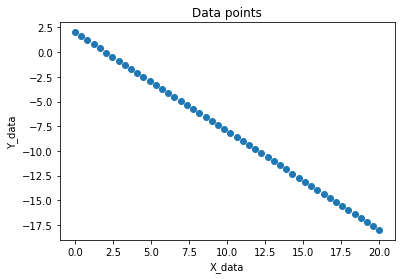

In [107]:
plt.xlabel('X_data')
plt.ylabel('Y_data')
plt.title("Data points");
plt.scatter(X_data,Y_data)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [108]:
def BatchGradientDescent(X, y, alpha, iters,eps):
    theta0=0
    theta1=0
    cost=[]
    th0=[]
    th1=[]
    allpredictions=[]
   
    for i in range(iters):
        th0.append(theta0)
        th1.append(theta1)
        yper=theta0+theta1*X
        allpredictions.append(yper)
        t=np.sum(np.power(yper-y,2))/2*len(X)
        cost.append(t)
        g1=np.sum(yper-y)/len(X)
        g2=np.sum((yper-y)*X)/len(X)
        theta0=theta0-(alpha*g1)
        theta1=theta1-(alpha*g2)
        grad=np.array([g1,g2])
        gnorm = np.linalg.norm(grad)
        if i>1:
            if(gnorm<eps):
                return th0,th1,cost,allpredictions
            elif abs(cost[i-1]-cost[i])<=eps:
                return th0,th1,cost,allpredictions
    return th0,th1,cost,allpredictions

         

In [109]:
alpha=.001
iters=100
theta_0,theta_1,costs,allpredictions=BatchGradientDescent(X_data, Y_data,alpha,iters,1e-3)
print(np.array(allpredictions))

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.00000000e-03 -5.48138276e-02 -1.01627655e-01 ... -2.20824990e+00
  -2.25506372e+00 -2.30187755e+00]
 [-1.48450612e-02 -1.02134527e-01 -1.89423993e-01 ... -4.11744997e+00
  -4.20473944e+00 -4.29202890e+00]
 ...
 [-1.23348015e-02 -3.59401775e-01 -7.06468748e-01 ... -1.63244825e+01
  -1.66715495e+01 -1.70186165e+01]
 [-1.18193258e-02 -3.58901984e-01 -7.05984642e-01 ... -1.63247043e+01
  -1.66717869e+01 -1.70188696e+01]
 [-1.13039814e-02 -3.58402316e-01 -7.05500651e-01 ... -1.63249257e+01
  -1.66720240e+01 -1.70191224e+01]]


In [110]:
from sklearn.metrics import r2_score
r2_score=r2_score(Y_data,allpredictions[-1])
print("r2_score= ",r2_score)

r2_score=  0.9699660723036078


(69,)
(69,)


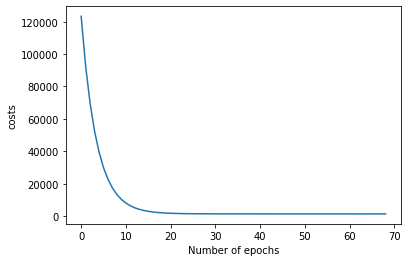

In [93]:
epochs = range(0,len(costs))
print(np.shape(epochs))
print(np.shape(costs))
plt.xlabel("Number of epochs")
plt.ylabel("costs")
plt.plot(epochs,costs)
plt.show()

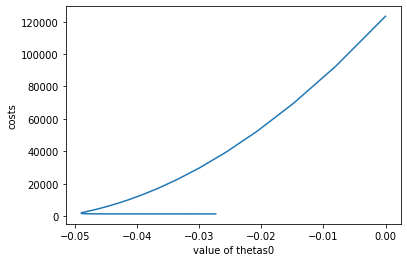

In [94]:
plt.plot(theta_0,costs)
plt.xlabel("value of thetas0")
plt.ylabel("costs")
plt.show()

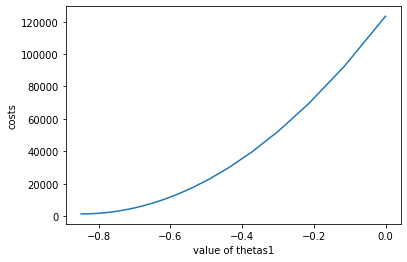

In [95]:
plt.plot(theta_1,costs)
plt.xlabel("value of thetas1")
plt.ylabel("costs")
plt.show()

In [96]:
print(np.shape(theta_1))
X_data=X_data.reshape(len(X_data),1)
print(np.shape(X_data))

(69,)
(50, 1)


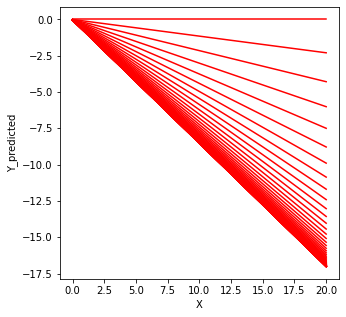

In [11]:
Y_predicted=theta_0+theta_1*X_data
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X_data,Y_predicted, 'r')
plt.xlabel('X')
plt.ylabel('Y_predicted')
plt.show()


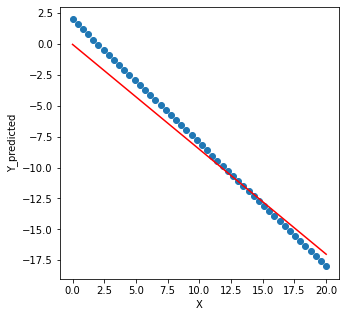

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X_data,allpredictions[-1] , 'r')
plt.xlabel('X')
plt.ylabel('Y_predicted')
plt.scatter(X_data,Y_data)
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

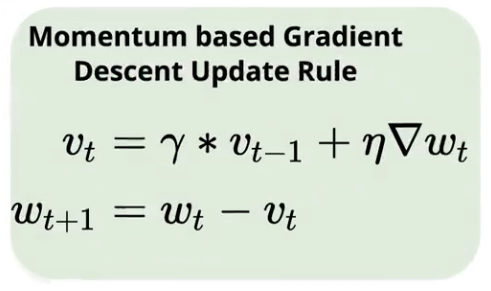

#### γ takes values between 0 and 1.
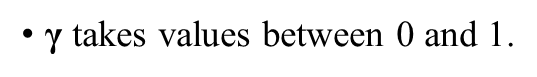

In [40]:
def Momentum_Based_GD(X, Y, alpha,gamma, iters,eps):
    theta0=0
    theta1=0
    velocity_0=velocity_1=0.0
    cost=[]
    th0=[]
    th1=[]
    allpredictions=[]
   
    for i in range(iters):
        th0.append(theta0)
        th1.append(theta1)
        yper=theta0+theta1*X
        allpredictions.append(yper)
        t=np.sum(np.power(yper-Y,2))/2*len(X)
        cost.append(t)
        g1=np.sum(yper-Y)/len(X)
        g2=np.sum((yper-Y)*X)/len(X)
        velocity_0=velocity_0 * gamma +alpha*g1
        velocity_1=velocity_1 * gamma +alpha*g2
        theta0=theta0-velocity_0
        theta1=theta1-velocity_1
        grad=np.array([g1,g2])
        gnorm = np.linalg.norm(grad)
        if i>1:
            if(gnorm<eps):
                return th0,th1,cost,allpredictions
            elif abs(cost[i-1]-cost[i])<=eps:
                return th0,th1,cost,allpredictions
#         theta0=theta0-velocity_0
#         theta1=theta1-velocity_1
      

    return th0,th1,cost,allpredictions
   
         

In [41]:
def MomentumGD(X,Y,gamma,eta,epochs,eps):
    theta0=theta1=0.0
    velocity0=velocity1=0.0
    allpredictions=[]
    thetas0=[]
    thetas1=[]
    m=len(X)
    losses=[]
    for i in range(epochs):
        hx=theta0+theta1*X
        losses.append(np.sum((hx-Y)**2)/(2*m))
        thetas0.append(theta0)
        thetas1.append(theta1)
        allpredictions.append(hx)
        grad0=np.sum((hx-Y))/m
        grad1=np.sum((hx-Y)@X)/m
        velocity0=velocity0 * gamma +eta*grad0
        velocity1=velocity1 * gamma +eta*grad1
        if np.linalg.norm([grad0,grad1])<=eps:
            return thetas0,thetas1,losses,allpredictions,theta0,theta1
        theta0=theta0-velocity0
        theta1=theta1-velocity1
    return thetas0,thetas1,losses,allpredictions

In [72]:
alpha=.01
iters=1000
gamma=.99

theta_0m,theta_1m,costsm,predictionsm=MomentumGD(X_data, Y_data, gamma, alpha,iters,1e-3)


In [52]:
from sklearn.metrics import r2_score
r2_scorem=r2_score(Y_data,predictionsm[-1])
print("r2_score_Momentum= ",r2_scorem)

r2_score_Momentum=  0.9999429030449636


(1000,)
(1000,)


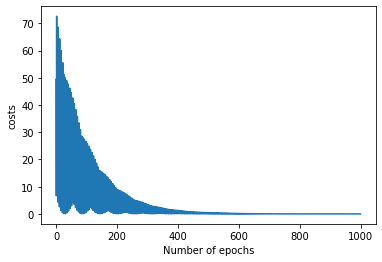

In [53]:
epochsm = range(0,len(costsm))
print(np.shape(epochsm))
print(np.shape(costsm))
plt.xlabel("Number of epochs")
plt.ylabel("costs")
plt.plot(epochsm,costsm)
plt.show()

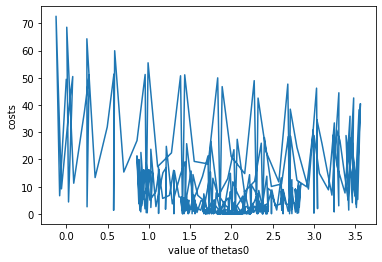

In [54]:
plt.plot(theta_0m,costsm)
plt.xlabel("value of thetas0")
plt.ylabel("costs")
plt.show()

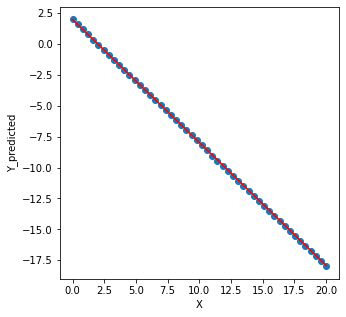

In [55]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X_data,predictionsm[-1] , 'r')
plt.xlabel('X')
plt.ylabel('Y_predicted')
plt.scatter(X_data,Y_data)
plt.show()


#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [74]:
alpha2=.01
iters2=1000
gamma2=.3

theta_0m2,theta_1m2,costsm2,predictionsm2=MomentumGD(X_data, Y_data, gamma2, alpha2,iters2,1e-3)


In [75]:
r2_scorem2=r2_score(Y_data,predictionsm2[-1])
print("r2_score_Momentum= ",r2_scorem2)

r2_score_Momentum=  0.9999793562534999


(1000,)
(1000,)


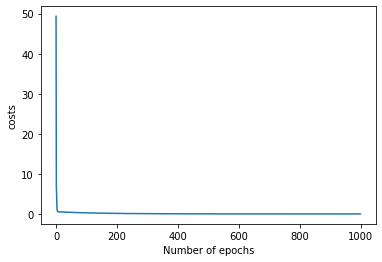

In [77]:
epochsm2 = range(0,len(costsm2))
print(np.shape(epochsm))
print(np.shape(costsm))
plt.xlabel("Number of epochs")
plt.ylabel("costs")
plt.plot(epochsm2,costsm2)
plt.show()

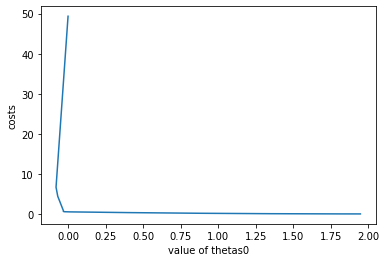

In [78]:
plt.plot(theta_0m2,costsm2)
plt.xlabel("value of thetas0")
plt.ylabel("costs")
plt.show()

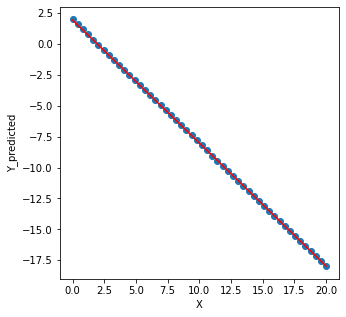

In [79]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X_data,predictionsm2[-1] , 'r')
plt.xlabel('X')
plt.ylabel('Y_predicted')
plt.scatter(X_data,Y_data)
plt.show()


In [81]:
alpha2=.01
iters2=1000
gamma2=0

theta_0m3,theta_1m3,costsm3,predictionsm3=MomentumGD(X_data, Y_data, gamma2, alpha2,iters2,1e-3)


In [82]:
r2_scorem3=r2_score(Y_data,predictionsm3[-1])
print("r2_score_Momentum= ",r2_scorem3)

r2_score_Momentum=  0.9998120560841548


(1000,)
(1000,)


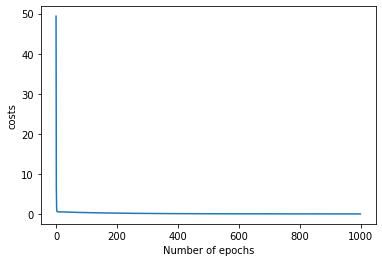

In [83]:
epochsm3 = range(0,len(costsm3))
print(np.shape(epochsm3))
print(np.shape(costsm3))
plt.xlabel("Number of epochs")
plt.ylabel("costs")
plt.plot(epochsm3,costsm3)
plt.show()

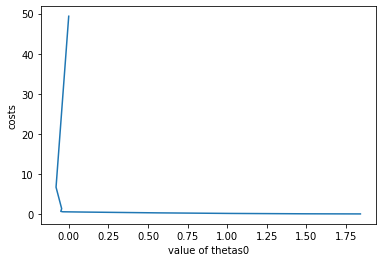

In [84]:
plt.plot(theta_0m3,costsm3)
plt.xlabel("value of thetas0")
plt.ylabel("costs")
plt.show()

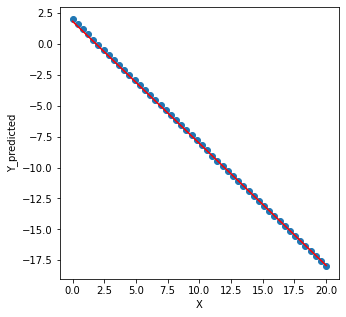

In [85]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X_data,predictionsm3[-1] , 'r')
plt.xlabel('X')
plt.ylabel('Y_predicted')
plt.scatter(X_data,Y_data)
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

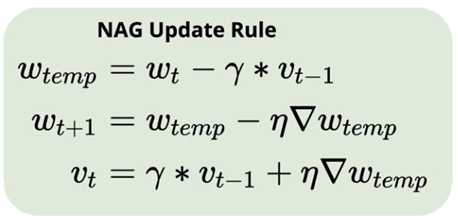

In [66]:

def NAGGD(X,Y,gamma,eta,epochs,eps):
    theta0=theta1=0.0
    w_t0=w_t1=0.0
    theta_temp0=theta_temp1=0.0
    V_t0=V_t1=0.0
    allpredictions=[]
    thetas0=[]
    thetas1=[]
    m=len(X)
    losses=[]
    for i in range(epochs):
        hx=theta0+theta1*X
        losses.append(np.sum((hx-Y)**2)/(2*m))
        thetas0.append(theta0)
        thetas1.append(theta1)
        allpredictions.append(hx)
        # temp thetas
        theta_temp0=theta0-gamma*V_t0
        theta_temp1=theta1-gamma*V_t1
        # grad
        h_temp=theta_temp0+theta_temp1*X
        grad_w_temp0=np.sum(h_temp-Y)/(m)
        grad_w_temp1=np.sum((h_temp-Y)@ X)/(m)
        # velocity update
        V_t0 = (gamma * V_t0 + eta * grad_w_temp0)
        V_t1 = (gamma * V_t1 + eta * grad_w_temp1)
        # new thetas
        theta0=theta_temp0-eta*grad_w_temp0
        theta1=theta_temp1-eta*grad_w_temp1
        
        if np.linalg.norm([grad_w_temp0,grad_w_temp1])<=eps:
            return thetas0,thetas1,losses,allpredictions
    return thetas0,thetas1,losses,allpredictions

In [67]:
alpha=.001
iters=1000
gamma=.99

theta_0n,theta_1n,costsn,predictionsn=NAGGD(X_data, Y_data, gamma, alpha,iters,1e-3)


In [68]:
from sklearn.metrics import r2_score
r2_scoren=r2_score(Y_data,predictionsn[-1])
print("r2_score_Momentum= ",r2_scoren)

r2_score_Momentum=  0.9999996668155013


(331,)
(331,)


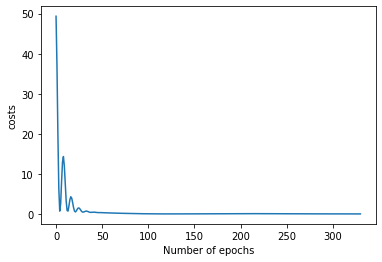

In [69]:
epochsn = range(0,len(costsn))
print(np.shape(epochsn))
print(np.shape(costsn))
plt.xlabel("Number of epochs")
plt.ylabel("costs")
plt.plot(epochsn,costsn)
plt.show()

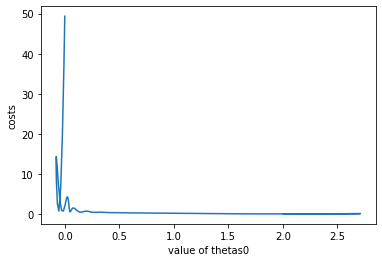

In [70]:
plt.plot(theta_0n,costsn)
plt.xlabel("value of thetas0")
plt.ylabel("costs")
plt.show()

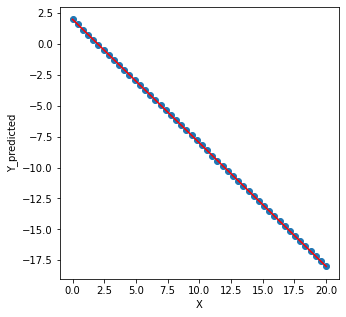

In [71]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X_data,predictionsn[-1] , 'r')
plt.xlabel('X')
plt.ylabel('Y_predicted')
plt.scatter(X_data,Y_data)
plt.show()

## Congratulations 
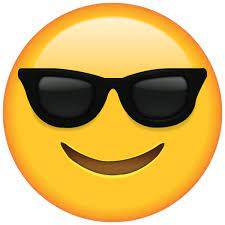